## Assignment Day 31 - Support Vector Machine
### Chintia Hildayanti
### Data Science 26

##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [ ]:
# load dataset

df = pd.read_csv('homework.csv')

In [ ]:
df.head()

,X,y
0,0.002756,0.733312
1,0.006167,0.006167
2,0.070651,0.070592
3,0.299684,0.295218
4,0.603322,0.567381


In [ ]:
X = df[['X']]
y = df[['y']]

svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel = 'poly')
svr_rbf = SVR(kernel = 'rbf')
linreg = LinearRegression()

# train the model on the data

# HOMEWORK:

We will now explore SVM for Regression.

Your instruction:
1. Open `homework.csv`
2. The X will be predictor variable, and y will be dependent/target variable
3. You will train 4 models as provided in the code above
4. Evaluate the performance (regression prediction) of each of the 4 models.


Answer the following question:

### Q1: What is the best model for this dataset? Why?

### Q2: What is the advantage and disadvantages of SVR over Linear Regression? Explain briefly in your own words!

In [ ]:
### Silakan mengerjakan dengan menuliskan Code di sini

##Split the dataset

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

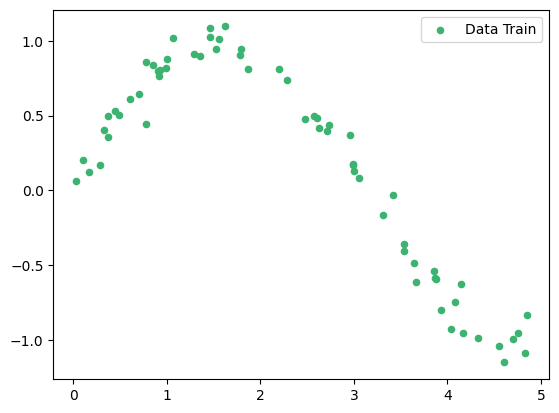

In [ ]:
# Melihat persebaran data

plt.scatter(
    X_train, y_train, s=20,
    color='mediumseagreen', label='Data Train'
)
plt.legend();

## 1. SVR - Linear Kernel

In [ ]:
# Fit SVR model with linear kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

# Predict on the training set
y_train_pred_linear = svr_linear.predict(X_train)

# Predict on the test set
y_test_pred_linear = svr_linear.predict(X_test)

# Evaluate the model
train_rmse_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
test_rmse_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

print(f'Training RMSE linear kernel: {train_rmse_linear:.3f}')
print(f'Test RMSE linear kernel: {test_rmse_linear:.3f}')

Training RMSE linear kernel: 0.426
Test RMSE linear kernel: 0.481


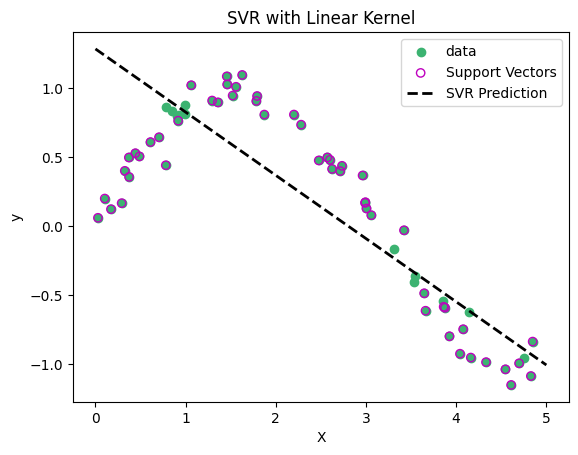

Training RMSE linear kernel: 0.426
Test RMSE linear kernel : 0.481


In [ ]:
# Visualize the results SVR with linear kernel
X_plot = np.linspace(0, 5, 1000)[:, np.newaxis]

plt.scatter(
    X_train, y_train,
    color='mediumseagreen',
    label='data'
)

plt.scatter(
    X_train[svr_linear.support_],
    y_train[svr_linear.support_],
    facecolors='none', edgecolors='m',
    label='Support Vectors'
)

plt.plot(
    X_plot,
    svr_linear.predict(X_plot),
    color='black', lw=2,
    label='SVR Prediction',
    linestyle='--'
)

plt.title(f'SVR with Linear Kernel')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show();

print(f'Training RMSE linear kernel: {train_rmse_linear:.3f}')
print(f'Test RMSE linear kernel : {test_rmse_linear:.3f}')

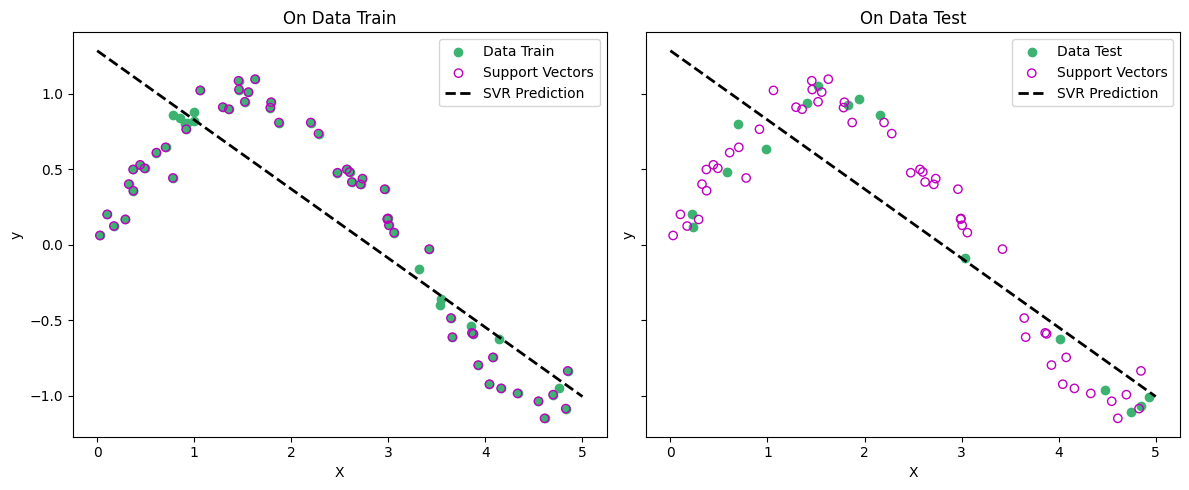

Training RMSE Linear Kernel: 0.426
Test RMSE Linear Kernel: 0.481


In [ ]:
# Create subplots
fig, axs = plt.subplots(
    1, 2, # (1 row, 2 columns)
    figsize=(12, 5),
    sharey=True)

# --------------Data Train VS Model Prediction--------------
axs[0].scatter(
    X_train, y_train,
    color='mediumseagreen',
    label='Data Train'
)
axs[0].scatter(
    X_train[svr_linear.support_],
    y_train[svr_linear.support_],
    facecolors='none', edgecolors='m',
    label='Support Vectors'
)
axs[0].plot(
    X_plot,
    svr_linear.predict(X_plot),
    color='black', lw=2,
    label='SVR Prediction',
    linestyle='--'
)
axs[0].set_title(f'SVR with Linear Kernel)')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].set_title('On Data Train')
axs[0].legend()

# --------------Data Test VS Model Prediction--------------
axs[1].scatter(
    X_test, y_test,
    color='mediumseagreen',
    label='Data Test'
)
axs[1].scatter(
    X_train[svr_linear.support_],
    y_train[svr_linear.support_],
    facecolors='none', edgecolors='m',
    label='Support Vectors'
)
axs[1].plot(
    X_plot,
    svr_linear.predict(X_plot),
    color='black', lw=2,
    label='SVR Prediction',
    linestyle='--'
)
axs[1].set_title(f'SVR with Linear Kernel')
axs[1].set_xlabel('X')
axs[1].set_ylabel('y')
axs[1].set_title('On Data Test')
axs[1].legend()
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()
print(f'Training RMSE Linear Kernel: {train_rmse_linear:.3f}')
print(f'Test RMSE Linear Kernel: {test_rmse_linear:.3f}')

## 2. SVR - Polynomial Kernel

In [ ]:
# Fit SVR model with a polynomial kernel of degree 2
deg = 2
svr_poly = SVR(kernel='poly', degree=deg)
svr_poly.fit(X_train, y_train)

# Predict on the training set
y_train_pred_poly = svr_poly.predict(X_train)

# Predict on the test set
y_test_pred_poly = svr_poly.predict(X_test)

# Evaluate the model
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

print(f'Training RMSE Polynomial Kernel: {train_rmse_poly:.3f}')
print(f'Test RMSE Polynomial Kernel: {test_rmse_poly:.3f}')

Training RMSE Polynomial Kernel: 0.310
Test RMSE Polynomial Kernel: 0.367


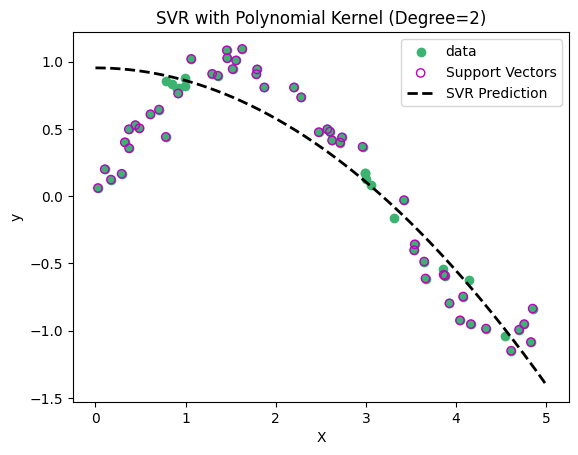

Training RMSE Polynomial Kernel: 0.310
Test RMSE Polynomial Kernel: 0.367


In [ ]:
# Visualize the results SVR with Polynomial Kernel
X_plot = np.linspace(0, 5, 1000)[:, np.newaxis]

plt.scatter(
    X_train, y_train,
    color='mediumseagreen',
    label='data'
)

plt.scatter(
    X_train[svr_poly.support_],
    y_train[svr_poly.support_],
    facecolors='none', edgecolors='m',
    label='Support Vectors'
)

plt.plot(
    X_plot,
    svr_poly.predict(X_plot),
    color='black', lw=2,
    label='SVR Prediction',
    linestyle='--'
)

plt.title(f'SVR with Polynomial Kernel (Degree={deg})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show();

print(f'Training RMSE Polynomial Kernel: {train_rmse_poly:.3f}')
print(f'Test RMSE Polynomial Kernel: {test_rmse_poly:.3f}')

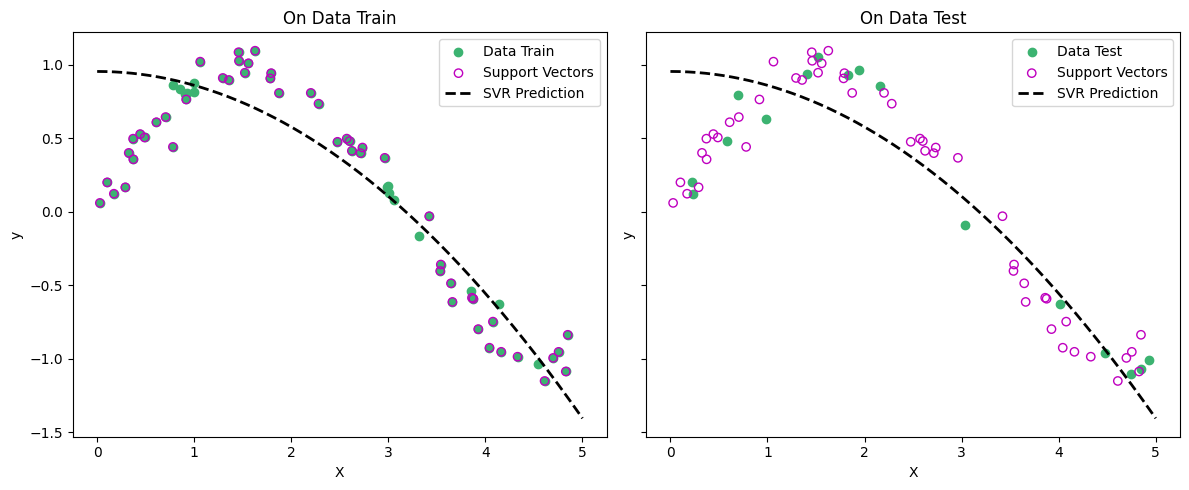

Training RMSE Polynomial Kernel: 0.310
Test RMSE Polynomial Kernel: 0.367


In [ ]:
# Create subplots
fig, axs = plt.subplots(
    1, 2, # (1 row, 2 columns)
    figsize=(12, 5),
    sharey=True)

# --------------Data Train VS Model Prediction--------------
axs[0].scatter(
    X_train, y_train,
    color='mediumseagreen',
    label='Data Train'
)
axs[0].scatter(
    X_train[svr_poly.support_],
    y_train[svr_poly.support_],
    facecolors='none', edgecolors='m',
    label='Support Vectors'
)
axs[0].plot(
    X_plot,
    svr_poly.predict(X_plot),
    color='black', lw=2,
    label='SVR Prediction',
    linestyle='--'
)
axs[0].set_title(f'SVR with Polynomial Kernel (Degree={deg})')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].set_title('On Data Train')
axs[0].legend()

# --------------Data Test VS Model Prediction--------------
axs[1].scatter(
    X_test, y_test,
    color='mediumseagreen',
    label='Data Test'
)
axs[1].scatter(
    X_train[svr_poly.support_],
    y_train[svr_poly.support_],
    facecolors='none', edgecolors='m',
    label='Support Vectors'
)
axs[1].plot(
    X_plot,
    svr_poly.predict(X_plot),
    color='black', lw=2,
    label='SVR Prediction',
    linestyle='--'
)
axs[1].set_title(f'SVR with Polynomial Kernel (Degree={deg})')
axs[1].set_xlabel('X')
axs[1].set_ylabel('y')
axs[1].set_title('On Data Test')
axs[1].legend()
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()
print(f'Training RMSE Polynomial Kernel: {train_rmse_poly:.3f}')
print(f'Test RMSE Polynomial Kernel: {test_rmse_poly:.3f}')

## 3. SVR - Radial Basis Function (RBF) Kernel

In [ ]:
# Fit SVR model with RBF Kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)

# Predict on the training set
y_train_pred_rbf = svr_rbf.predict(X_train)

# Predict on the test set
y_test_pred_rbf = svr_rbf.predict(X_test)

# Evaluate the model
train_rmse_rbf = np.sqrt(mean_squared_error(y_train, y_train_pred_rbf))
test_rmse_rbf = np.sqrt(mean_squared_error(y_test, y_test_pred_rbf))

print(f'Training RMSE RBF Kernel: {train_rmse_rbf:.3f}')
print(f'Test RMSE RBF Kernel: {test_rmse_rbf:.3f}')

Training RMSE RBF Kernel: 0.090
Test RMSE RBF Kernel: 0.117


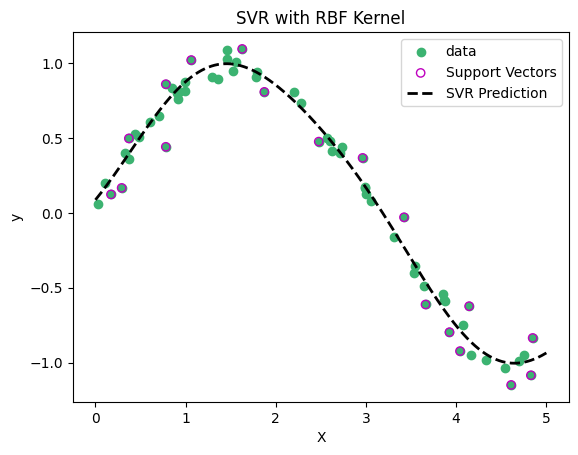

Training RMSE RBF Kernel: 0.090
Test RMSE RBF Kernel: 0.117


In [ ]:
# Visualize the results SVR with RBF Kernel
X_plot = np.linspace(0, 5, 1000)[:, np.newaxis]

plt.scatter(
    X_train, y_train,
    color='mediumseagreen',
    label='data'
)

plt.scatter(
    X_train[svr_rbf.support_],
    y_train[svr_rbf.support_],
    facecolors='none', edgecolors='m',
    label='Support Vectors'
)

plt.plot(
    X_plot,
    svr_rbf.predict(X_plot),
    color='black', lw=2,
    label='SVR Prediction',
    linestyle='--'
)

plt.title(f'SVR with RBF Kernel')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show();

print(f'Training RMSE RBF Kernel: {train_rmse_rbf:.3f}')
print(f'Test RMSE RBF Kernel: {test_rmse_rbf:.3f}')

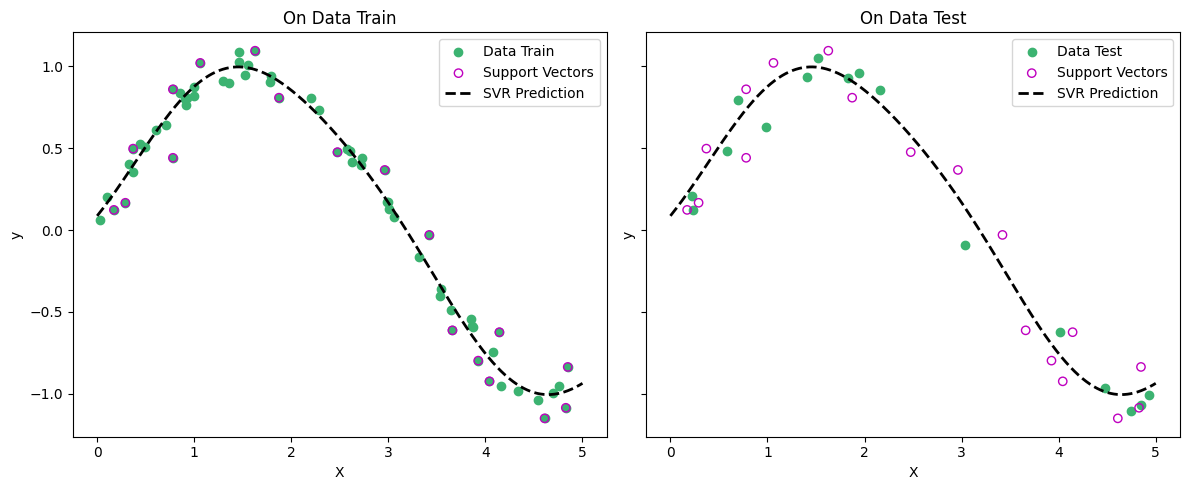

Training RMSE RBF Kernel: 0.090
Test RMSE RBF Kernel: 0.117


In [ ]:
# Create subplots
fig, axs = plt.subplots(
    1, 2, # (1 row, 2 columns)
    figsize=(12, 5),
    sharey=True)

# --------------Data Train VS Model Prediction--------------
axs[0].scatter(
    X_train, y_train,
    color='mediumseagreen',
    label='Data Train'
)
axs[0].scatter(
    X_train[svr_rbf.support_],
    y_train[svr_rbf.support_],
    facecolors='none', edgecolors='m',
    label='Support Vectors'
)
axs[0].plot(
    X_plot,
    svr_rbf.predict(X_plot),
    color='black', lw=2,
    label='SVR Prediction',
    linestyle='--'
)
axs[0].set_title(f'SVR with RBF Kernel')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].set_title('On Data Train')
axs[0].legend()

# --------------Data Test VS Model Prediction--------------
axs[1].scatter(
    X_test, y_test,
    color='mediumseagreen',
    label='Data Test'
)
axs[1].scatter(
    X_train[svr_rbf.support_],
    y_train[svr_rbf.support_],
    facecolors='none', edgecolors='m',
    label='Support Vectors'
)
axs[1].plot(
    X_plot,
    svr_rbf.predict(X_plot),
    color='black', lw=2,
    label='SVR Prediction',
    linestyle='--'
)
axs[1].set_title(f'SVR with RBF Kernel')
axs[1].set_xlabel('X')
axs[1].set_ylabel('y')
axs[1].set_title('On Data Test')
axs[1].legend()
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()
print(f'Training RMSE RBF Kernel: {train_rmse_rbf:.3f}')
print(f'Test RMSE RBF Kernel: {test_rmse_rbf:.3f}')

##4. Linear Regression

In [ ]:
# define the model
lin_reg = LinearRegression()

#train the model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Buat DataFrame dengan koefisien dan intercept

feature_names = ['X' + str(i) for i in range(data.shape[1])]

coef_df = pd.DataFrame({
    'feature': ['intercept'] + feature_names,
    'coefficient': [model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.050948
1,X0,-0.376541


In [ ]:
# Predict on the training set

y_predict_train_linreg = lin_reg.predict(X_train)

# Evaluate the model
print('Training RMSE Linear Regression {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train_linreg))))

Training RMSE Linear Regression 0.4060112894841848


In [ ]:
# Predict on the test set

y_predict_test_linreg = lin_reg.predict(X_test)

# Evaluate the model
print('Test RMSE Linear Regression {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_linreg))))

Test RMSE Linear Regression 0.4629407337341235


# JAWABAN


### Q1: Jawaban Anda:

Model SVR dengan RBF Kernel adalah model terbaik karena memiliki RMSE paling kecil yaitu 0.090 pada data training dan 0.117 pada data testing. <br>
support vector pada training dan data sama posisinya, prediksi data test tetap mengikuti tren dan tidak terlalu cocok dengan data test aslinya. data predict tersebut tetap menjaga tren (dijaga oleh support vector).

### Q2: Jawaban Anda:

Kelebihan SVR dibanding Regresi Linear : SVR lebih fleksibel bisa menangani data non linear menggunakan kernel. SVR lebih tahan terhadap outlier (robust) karena SVR berfokus pada memaksimalkan margin. SVR menghasilkan performa generalisasi yang lebih baik pada data baru. <br1>

Kekurangan SVR dibanding Regresi Linear : SVR menggunakan komputasi yang lebih berat karena lebih banyak hyperparameter yang perlu dioptimalkan, SVR lebih sulit di interpretasikan.
